In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline
pd.option_context('mode.use_inf_as_na', True)


In [2]:
file_path = 'dd/resultats/task_1_8/graph.txt'
df = pd.read_csv(file_path, delim_whitespace=True, header=0)
list_2 = df['RHO_TOT'].values.tolist()
list_1 = df['TAU'].values.tolist()
array = np.column_stack([list_1, list_2])


In [3]:
def find_elbow(data: np.array, theta: float) -> int: 
    '''
    finds the elbow - where data deviates form linear behavior
    returns int index where point is in np.array[:,0]
    '''
    # make rotation matrix
    co = np.cos(theta)
    si = np.sin(theta)
    rotation_matrix = np.array(((co, -si), (si, co)))

    # rotate data vector
    rotated_vector = data.dot(rotation_matrix)

    # return index of elbow
    return np.where(rotated_vector == rotated_vector[:, 1].min())[0][0]
    
def get_data_radiant(data):
  return np.arctan2(data[:, 1].max() - data[:, 1].min(), 
                    data[:, 0].max() - data[:, 0].min())


In [4]:
theta = get_data_radiant(array)
elbow_index = find_elbow(array, theta)
tau_crit, rho_crit = (array[elbow_index,0], array[elbow_index,1])




In [5]:
#extracting of tau_crit from graph_*.txt

file_path = 'dd/resultats/task_2/graph_119.txt'

df = pd.read_csv(file_path, delim_whitespace=True, header=0)
list_2 = df['RHO_TOT'].values.tolist()

list_1 = df['TAU'].values.tolist()

array = np.column_stack([list_1, list_2])
theta = get_data_radiant(array)
elbow_index = find_elbow(array, theta)
tau_crit, rho_crit = (array[elbow_index,0], array[elbow_index,1])



print(tau_crit)


74.0


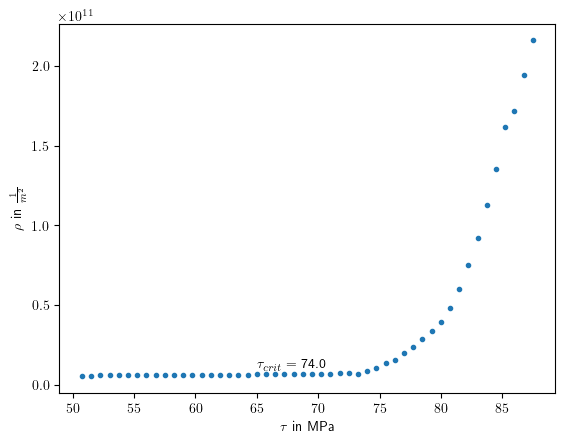

In [6]:
plt.rcParams['text.usetex'] = True #to render LaTeX output
fig, ax = plt.subplots()
ax.plot(list_1[1:], list_2[1:], '.')
ax.set_xlabel(r"$\tau$ in MPa")
ax.set_ylabel(r"$\rho$ in $\frac{1}{m^2}$ ")

ax.text(65, 1e10, "\\(\\tau_{crit} =\\) {t_crit}".format(crit='{crit}', t_crit=tau_crit)) #hack to escape key {crit} not found error

fig.savefig('report/graphics/plot_tau_crit_L_100nm')

In [7]:
#extracting of tau_crit from graph_*.txt
base_path = 'dd/resultats/task_2/graph_'
graph_names = ['59_5', '79_3', '119', '178_5', '238' ]

tau_crit_list = []
rho_crit_list = []
rho_list = []
tau_list = []

for graph_name in graph_names:
    file_path = base_path + graph_name + '.txt'
    df = pd.read_csv(file_path, delim_whitespace=True, header=0)
    list_2 = df['RHO_TOT'].values.tolist()
    rho_list.append(list_2)
    list_1 = df['TAU'].values.tolist()
    tau_list.append(list_1)
    array = np.column_stack([list_1, list_2])
    theta = get_data_radiant(array)
    elbow_index = find_elbow(array, theta)
    tau_crit, rho_crit = (array[elbow_index,0], array[elbow_index,1])
    tau_crit_list.append(tau_crit)
    rho_crit_list.append(rho_crit)

print(tau_crit_list)


[164.5, 137.5, 74.0, 67.75, 53.0]


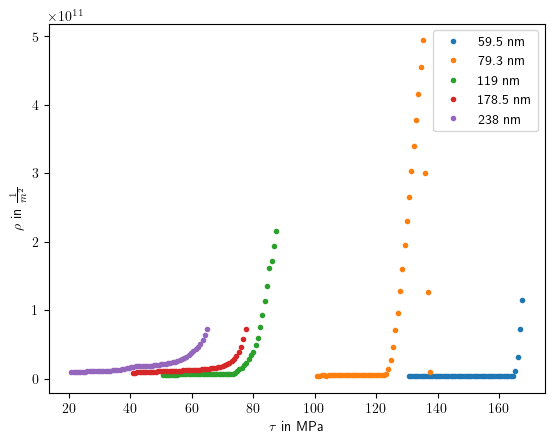

In [8]:
plt.rcParams['text.usetex'] = True #to render LaTeX output
fig, ax = plt.subplots()
ax.plot(tau_list[0][1:],rho_list[0][1:], '.', label='59.5 nm')
ax.plot(tau_list[1][1:],rho_list[1][1:], '.', label='79.3 nm')
ax.plot(tau_list[2][1:],rho_list[2][1:], '.', label='119 nm')
ax.plot(tau_list[3][1:],rho_list[3][1:], '.', label='178.5 nm')
ax.plot(tau_list[4][1:],rho_list[4][1:], '.', label='238 nm')
ax.set_xlabel(r"$\tau$ in MPa")
ax.set_ylabel(r"$\rho$ in $\frac{1}{m^2}$ ")
ax.legend()


In [9]:
#calculation on theoretical tau_crits
alpha = 0.8158667972575904 #fitted for tau_crit=73.5 MPa L=119 nm
mu = 42e3 # MPa
b = 2.5525e-10 #m
L = 119e-9 #m
def tau_crit(mu, b, alpha, L):
    return alpha * mu * b / L

In [10]:
theo_tau_crit_list=[] #in MPa
length_list = [L/2,L*2/3, L, 1.5*L, 2*L] #in m
for L_i in length_list:
    tau_crit_i = tau_crit(mu=mu, b=b, alpha=alpha, L=L_i)
    theo_tau_crit_list.append(tau_crit_i)

In [11]:
alpha_old =  0.5
init_alpha_tau_crit_list = []
for L_i in length_list:
    tau_crit_i = tau_crit(mu=mu, b=b, alpha=alpha_old, L=L_i)
    init_alpha_tau_crit_list.append(tau_crit_i)


In [12]:
print(length_list)
print(theo_tau_crit_list)
print(tau_crit_list)

[5.95e-08, 7.933333333333333e-08, 1.19e-07, 1.785e-07, 2.38e-07]
[146.99999999999997, 110.24999999999999, 73.49999999999999, 48.99999999999999, 36.74999999999999]
[164.5, 137.5, 74.0, 67.75, 53.0]


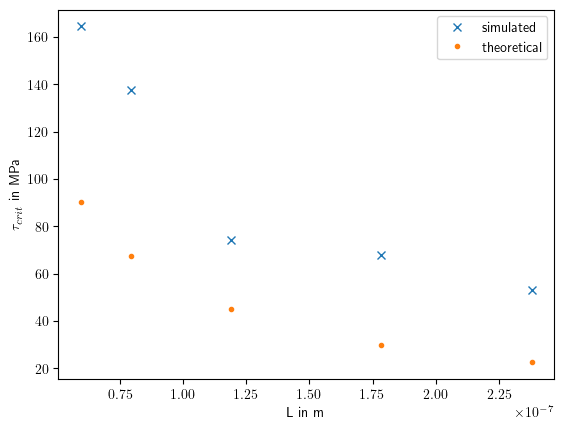

In [13]:
plt.rcParams['text.usetex'] = True #to render LaTeX output
fig, ax = plt.subplots()

ax.plot(length_list, tau_crit_list, 'x', label = 'simulated')
ax.plot(length_list, init_alpha_tau_crit_list, '.', label = 'theoretical')
ax.set_xlabel(r"L in m")
ax.set_ylabel(r"$\tau_{crit}$ in MPa ")
ax.legend()

fig.savefig('report/graphics/seg_length_tau_crit')



In [14]:
def calculate_error(theo : list, simulated : list) -> float:
    N = len(theo)
    sum = 0
    for i in range(0, N):
        sum += np.sqrt(((simulated[i] - theo[i])**2))
    return sum/N

print(calculate_error(theo= init_alpha_tau_crit_list, simulated=tau_crit_list))
        
        

48.29999999999999


In [19]:
# plotting different beta vs alpha
base_path = 'dd/resultats/task_3/graph_'
graph_names = [3,4,5,6,7,8,1]
print(graph_names)
betas = [2*np.pi if i ==1 else 2*np.pi*(i-1)/(8) for i in graph_names] 
print(betas)

[3, 4, 5, 6, 7, 8, 1]
[1.5707963267948966, 2.356194490192345, 3.141592653589793, 3.9269908169872414, 4.71238898038469, 5.497787143782138, 6.283185307179586]


In [24]:
tau_crit_list = []
rho_crit_list = []
rho_list = []
tau_list = []
for graph_name in graph_names:
    file_path = base_path + str(graph_name) + '.txt'
    print(file_path)
    df = pd.read_csv(file_path, delim_whitespace=True, header=0)
    list_2 = df['RHO_TOT'].values.tolist()
    rho_list.append(list_2)
    list_1 = df['TAU'].values.tolist()
    tau_list.append(list_1)
    array = np.column_stack([list_1, list_2])
    theta = get_data_radiant(array)
    elbow_index = find_elbow(array, theta)
    tau_crit, rho_crit = (array[elbow_index,0], array[elbow_index,1])
    tau_crit_list.append(tau_crit)
    rho_crit_list.append(rho_crit)

print(tau_crit_list)
#redo from 2 on!!!


dd/resultats/task_3/graph_3.txt
dd/resultats/task_3/graph_4.txt
dd/resultats/task_3/graph_5.txt
dd/resultats/task_3/graph_6.txt
dd/resultats/task_3/graph_7.txt
dd/resultats/task_3/graph_8.txt
dd/resultats/task_3/graph_1.txt
[74.0, 77.75, 162.25, 92.25, 126.5, 126.5, 162.25]


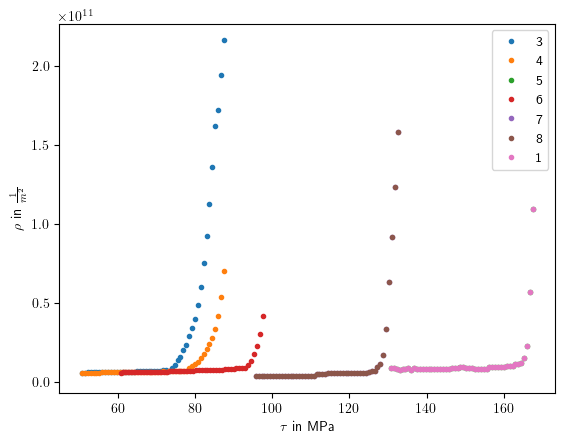

In [26]:
plt.rcParams['text.usetex'] = True #to render LaTeX output
fig, ax = plt.subplots()
for i in range(0,len(graph_names)):
    ax.plot(tau_list[i][1:],rho_list[i][1:], '.', label='{}'.format(graph_names[i]))
ax.set_xlabel(r"$\tau$ in MPa")
ax.set_ylabel(r"$\rho$ in $\frac{1}{m^2}$ ")
ax.legend()

In [27]:
#calculate alphas
mu = 42e3 # MPa
b = 2.5525e-10 #m
L_1 = 119e-9 #m
L_2 = 120e-09 #m
def alpha(tau_crit, mu, b, L):
    return tau_crit*L/(mu*b)
alpha_list = []
for type, tau_crit in zip(graph_names, tau_crit_list):
    if type == 3 or type == 7:
        alpha_list.append(alpha(tau_crit, mu, b, L_1))
    else:
        alpha_list.append(alpha(tau_crit, mu, b, L_2))

print(alpha_list)


[0.8214169115246489, 0.8702952287673147, 1.8161466349517275, 1.032601091367007, 1.4041789095657848, 1.4159787323352453, 1.8161466349517275]


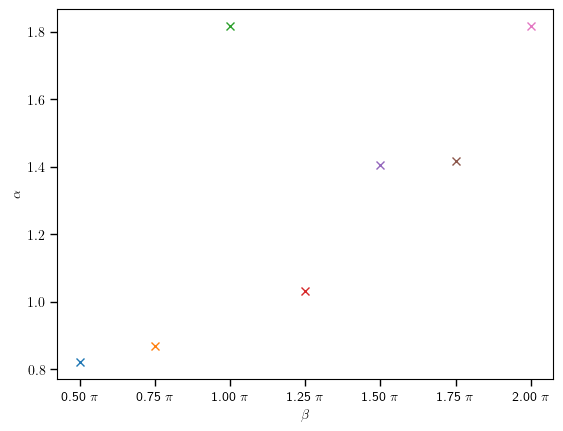

In [57]:
plt.rcParams['text.usetex'] = True #to render LaTeX output
fig, ax = plt.subplots()
for i in range(0,len(graph_names)):
    ax.plot(betas[i]/np.pi,alpha_list[i], 'x', )
xticks = np.arange(0.5, 2.25, 0.25)
xlabels = [f'{x:1.2f} $\pi$' for x in xticks]
ax.set_xticks(xticks, labels=xlabels)
ax.tick_params(which='major', width=1.00, length=5)
ax.tick_params(which='minor', width=0.75, length=2.5)
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$\alpha$ ")

fig.savefig('report/graphics/beta_vs_alpha')